In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import kagglehub

np.random.seed(42) #reproductible results 

#Directory 
BASE_DIR = Path("..").resolve()
DATA_DIR = BASE_DIR / "data"
RAW_DIR = DATA_DIR / "raw"
PROC_DIR = DATA_DIR / "processed"

RAW_DIR.mkdir(parents=True, exist_ok=True)
PROC_DIR.mkdir(parents=True, exist_ok=True)

BASE_DIR, RAW_DIR, PROC_DIR

(PosixPath('/files/Project_DSAP'),
 PosixPath('/files/Project_DSAP/data/raw'),
 PosixPath('/files/Project_DSAP/data/processed'))

In [36]:
#Kaggle dataset
# Download latest version
path = kagglehub.dataset_download("pritish509/s-and-p-500-esg-risk-ratings")

print("Path to dataset files:", path)

Path to dataset files: /home/datahub/.cache/kagglehub/datasets/pritish509/s-and-p-500-esg-risk-ratings/versions/2


In [37]:
#File csv name 
from pathlib import Path

# the path of  kagglehub.dataset_download
src_dir = Path(path)

# list of the files in this directory
for p in src_dir.iterdir():
    print(p.name)


SP 500 ESG Risk Ratings.csv


In [38]:
from shutil import copy2

BASE_DIR = Path("..").resolve()
DATA_DIR = BASE_DIR / "data"
RAW_DIR = DATA_DIR / "raw"

RAW_DIR.mkdir(parents=True, exist_ok=True)


csv_src = src_dir / "SP 500 ESG Risk Ratings.csv"
csv_dst = RAW_DIR / "esg_risk_ratings.csv"  #change name
copy2(csv_src, csv_dst)

csv_dst, csv_dst.exists()


(PosixPath('/files/Project_DSAP/data/raw/esg_risk_ratings.csv'), True)

In [39]:
#Transform csv in Dataframe to work on it with Python
import pandas as pd

esg_path = RAW_DIR / "esg_risk_ratings.csv"
df_esg = pd.read_csv(esg_path)

df_esg.head()


,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,ENPH,"Enphase Energy, Inc.","47281 Bayside Parkway\nFremont, CA 94538\nUnit...",Technology,Solar,"3,157","Enphase Energy, Inc., together with its subsid...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EMN,Eastman Chemical Company,"200 South Wilcox Drive\nKingsport, TN 37662\nU...",Basic Materials,Specialty Chemicals,"14,000",Eastman Chemical Company operates as a special...,25.3,12.8,6.6,5.8,Moderate Controversy Level,2.0,50th percentile,Medium
2,DPZ,Domino's Pizza Inc.,"30 Frank Lloyd Wright Drive\nAnn Arbor, MI 481...",Consumer Cyclical,Restaurants,"6,500","Domino's Pizza, Inc., through its subsidiaries...",29.2,10.6,6.3,12.2,Moderate Controversy Level,2.0,66th percentile,Medium
3,DAY,"Dayforce, Inc.","3311 East Old Shakopee Road\nMinneapolis, MN 5...",Technology,Software - Application,"9,084","Dayforce Inc., together with its subsidiaries,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DVA,Davita Inc.,"2000 16th Street\nDenver, CO 80202\nUnited States",Healthcare,Medical Care Facilities,"70,000",DaVita Inc. provides kidney dialysis services ...,22.6,0.1,8.4,14.1,Moderate Controversy Level,2.0,38th percentile,Medium


In [40]:
#name of the columns
df_esg.columns



Index(['Symbol', 'Name', 'Address', 'Sector', 'Industry',
       'Full Time Employees', 'Description', 'Total ESG Risk score',
       'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score',
       'Controversy Level', 'Controversy Score', 'ESG Risk Percentile',
       'ESG Risk Level'],
      dtype='object')

In [41]:

df_esg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 502 non-null    object 
 3   Sector                  502 non-null    object 
 4   Industry                502 non-null    object 
 5   Full Time Employees     498 non-null    object 
 6   Description             502 non-null    object 
 7   Total ESG Risk score    430 non-null    float64
 8   Environment Risk Score  430 non-null    float64
 9   Governance Risk Score   430 non-null    float64
 10  Social Risk Score       430 non-null    float64
 11  Controversy Level       430 non-null    object 
 12  Controversy Score       403 non-null    float64
 13  ESG Risk Percentile     430 non-null    object 
 14  ESG Risk Level          430 non-null    ob

In [42]:
# Copy to clean the dataset
df_esg_clean = df_esg.copy()

# 1) Rename the columns 
df_esg_clean = df_esg_clean.rename(columns={
    "Symbol": "Ticker",
    "Name": "Company",
    "Full Time Employees": "FullTimeEmployees",
    "Total ESG Risk score": "ESG_Risk_Score",
    "Environment Risk Score": "ESG_Env_Score",
    "Governance Risk Score": "ESG_Gov_Score",
    "Social Risk Score": "ESG_Soc_Score",
    "ESG Risk Level": "ESG_Risk_Level"
})

# 2) Keep only data that are important for the project 
cols_keep = [
    "Ticker",
    "Company",
    "Sector",
    "Industry",
    "FullTimeEmployees",
    "ESG_Risk_Score",
    "ESG_Env_Score",
    "ESG_Gov_Score",
    "ESG_Soc_Score",
    "ESG_Risk_Level",
    "ESG Risk Percentile",  
    "Controversy Level",
    "Controversy Score",
    "Description"
]

df_esg_clean = df_esg_clean[cols_keep]

# 3) Delete rows without thicker or ESG scored 
df_esg_clean = df_esg_clean.dropna(subset=["Ticker", "ESG_Risk_Score"])

# 4) Clean the thicker (space, uppercase and lowercase)
df_esg_clean["Ticker"] = df_esg_clean["Ticker"].str.strip().str.upper()

df_esg_clean.head()


,Ticker,Company,Sector,Industry,FullTimeEmployees,ESG_Risk_Score,ESG_Env_Score,ESG_Gov_Score,ESG_Soc_Score,ESG_Risk_Level,ESG Risk Percentile,Controversy Level,Controversy Score,Description
1,EMN,Eastman Chemical Company,Basic Materials,Specialty Chemicals,"14,000",25.3,12.8,6.6,5.8,Medium,50th percentile,Moderate Controversy Level,2.0,Eastman Chemical Company operates as a special...
2,DPZ,Domino's Pizza Inc.,Consumer Cyclical,Restaurants,"6,500",29.2,10.6,6.3,12.2,Medium,66th percentile,Moderate Controversy Level,2.0,"Domino's Pizza, Inc., through its subsidiaries..."
4,DVA,Davita Inc.,Healthcare,Medical Care Facilities,"70,000",22.6,0.1,8.4,14.1,Medium,38th percentile,Moderate Controversy Level,2.0,DaVita Inc. provides kidney dialysis services ...
5,DRI,"Darden Restaurants, Inc.",Consumer Cyclical,Restaurants,"187,384",27.5,7.9,4.6,15.0,Medium,59th percentile,Moderate Controversy Level,2.0,"Darden Restaurants, Inc., together with its su..."
6,ZTS,Zoetis Inc.,Healthcare,Drug Manufacturers - Specialty & Generic,"14,100",18.8,3.2,8.7,6.8,Low,23rd percentile,Moderate Controversy Level,2.0,"Zoetis Inc. engages in the discovery, developm..."


In [43]:
#How many rows ? Which columns ? How many missing values ?
df_esg_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 1 to 502
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               430 non-null    object 
 1   Company              430 non-null    object 
 2   Sector               430 non-null    object 
 3   Industry             430 non-null    object 
 4   FullTimeEmployees    426 non-null    object 
 5   ESG_Risk_Score       430 non-null    float64
 6   ESG_Env_Score        430 non-null    float64
 7   ESG_Gov_Score        430 non-null    float64
 8   ESG_Soc_Score        430 non-null    float64
 9   ESG_Risk_Level       430 non-null    object 
 10  ESG Risk Percentile  430 non-null    object 
 11  Controversy Level    430 non-null    object 
 12  Controversy Score    403 non-null    float64
 13  Description          430 non-null    object 
dtypes: float64(5), object(9)
memory usage: 50.4+ KB


In [44]:
#mean , min , max 
df_esg_clean["ESG_Risk_Score"].describe()


count    430.000000
mean      21.533721
std        6.889176
min        7.100000
25%       16.400000
50%       21.050000
75%       26.000000
max       41.700000
Name: ESG_Risk_Score, dtype: float64

In [45]:
#Distribution of ESG risk level 
df_esg_clean["ESG_Risk_Level"].value_counts()


ESG_Risk_Level
Low           187
Medium        184
High           50
Negligible      6
Severe          3
Name: count, dtype: int64

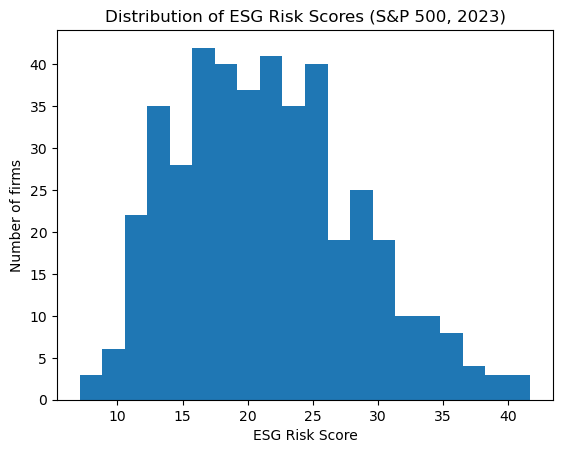

In [46]:
#First visualization of data
import matplotlib.pyplot as plt

plt.hist(df_esg_clean["ESG_Risk_Score"], bins=20)
plt.xlabel("ESG Risk Score")
plt.ylabel("Number of firms")
plt.title("Distribution of ESG Risk Scores (S&P 500, 2023)")
plt.show()


In [47]:
#looking for data from yahoo finance 
import yfinance as yf

# Get tickers from the kaggle dataset
tickers = df_esg_clean["Ticker"].dropna().unique().tolist()
len(tickers), tickers[:10]


(430, ['EMN', 'DPZ', 'DVA', 'DRI', 'ZTS', 'ZBH', 'YUM', 'XYL', 'XEL', 'WYNN'])

In [ ]:

import yfinance as yf

def fetch_yf_info(ticker: str) -> dict:
    """
    Récupère quelques indicateurs financiers publics pour un ticker donné.
    En cas d'erreur (404, etc.), renvoie simplement des None.
    """
    try:
        t = yf.Ticker(ticker)
        info = t.info  
    except Exception:
        # if yfinance crashes 
        return {
            "Ticker": ticker,
            "MarketCap": None,
            "PE": None,
            "ROE": None,
            "DebtToEquity": None,
            "Beta": None,
            "DividendYield": None,
        }

    # if information is empty 
    if not isinstance(info, dict) or len(info) == 0:
        return {
            "Ticker": ticker,
            "MarketCap": None,
            "PE": None,
            "ROE": None,
            "DebtToEquity": None,
            "Beta": None,
            "DividendYield": None,
        }

    # Normal case : gets all interesting informations
    return {
        "Ticker": ticker,
        "MarketCap": info.get("marketCap"),
        "PE": info.get("trailingPE"),
        "ROE": info.get("returnOnEquity"),
        "DebtToEquity": info.get("debtToEquity"),
        "Beta": info.get("beta"),
        "DividendYield": info.get("dividendYield"),
    }




In [49]:
#
rows = []

for t in tickers:
    row = fetch_yf_info(t)
    rows.append(row)

df_yf = pd.DataFrame(rows)
df_yf.head()


HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: WBA"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: PARA"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: HES"}}}
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: ANSS"}}}


,Ticker,MarketCap,PE,ROE,DebtToEquity,Beta,DividendYield
0,EMN,7.313676e+09,10.632721,0.12116,89.235,1.247,5.16
1,DPZ,1.476557e+10,25.434795,NaN,NaN,1.145,1.61
2,DVA,8.630050e+09,12.443299,0.61618,953.093,0.994,NaN
3,DRI,2.154266e+10,19.803322,0.50411,361.727,0.656,3.29
4,ZTS,5.334156e+10,20.262627,0.49868,135.050,0.971,1.79


In [50]:
df_yf.info()
df_yf.isna().mean()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ticker         430 non-null    object 
 1   MarketCap      423 non-null    float64
 2   PE             401 non-null    float64
 3   ROE            396 non-null    float64
 4   DebtToEquity   371 non-null    float64
 5   Beta           423 non-null    float64
 6   DividendYield  360 non-null    float64
dtypes: float64(6), object(1)
memory usage: 23.6+ KB


Ticker           0.000000
MarketCap        0.016279
PE               0.067442
ROE              0.079070
DebtToEquity     0.137209
Beta             0.016279
DividendYield    0.162791
dtype: float64

In [51]:
# merge ESG data and financial data on the common identifier Ticker using an inner join
df_merged = df_esg_clean.merge(df_yf, on="Ticker", how="inner")

df_merged.head()
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               430 non-null    object 
 1   Company              430 non-null    object 
 2   Sector               430 non-null    object 
 3   Industry             430 non-null    object 
 4   FullTimeEmployees    426 non-null    object 
 5   ESG_Risk_Score       430 non-null    float64
 6   ESG_Env_Score        430 non-null    float64
 7   ESG_Gov_Score        430 non-null    float64
 8   ESG_Soc_Score        430 non-null    float64
 9   ESG_Risk_Level       430 non-null    object 
 10  ESG Risk Percentile  430 non-null    object 
 11  Controversy Level    430 non-null    object 
 12  Controversy Score    403 non-null    float64
 13  Description          430 non-null    object 
 14  MarketCap            423 non-null    float64
 15  PE                   401 non-null    flo

In [52]:
num_cols = ["MarketCap", "PE", "ROE", "DebtToEquity", "Beta", "DividendYield"]
cat_cols = ["Sector", "Industry"]
target_col = "ESG_Risk_Level"

df_merged[num_cols].isna().mean()


MarketCap        0.016279
PE               0.067442
ROE              0.079070
DebtToEquity     0.137209
Beta             0.016279
DividendYield    0.162791
dtype: float64

In [53]:
# Numeric missing values are imputed using column medians to preserve the dataset size while avoiding strong assumptions
df_merged[num_cols] = df_merged[num_cols].apply(
    lambda col: col.fillna(col.median())
)

# Categorical missing values are replaced with the label 'Unknown'
df_merged[cat_cols] = df_merged[cat_cols].fillna("Unknown")

df_merged[num_cols].isna().mean(), df_merged[cat_cols].isna().mean()


(MarketCap        0.0
 PE               0.0
 ROE              0.0
 DebtToEquity     0.0
 Beta             0.0
 DividendYield    0.0
 dtype: float64,
 Sector      0.0
 Industry    0.0
 dtype: float64)

In [ ]:
# 1) Encodage one-hot pour les variables catégorielles
X_cat = pd.get_dummies(df_merged[cat_cols], drop_first=True)

# 2) Numerical features 
X_num = df_merged[num_cols]

# 3) Final Matrix of features 
X = pd.concat([X_num, X_cat], axis=1)

# 4) Target is ESG Risk Level 
y = df_merged[target_col]

X.shape, y.shape, y.value_counts()


((430, 125),
 (430,),
 ESG_Risk_Level
 Low           187
 Medium        184
 High           50
 Negligible      6
 Severe          3
 Name: count, dtype: int64)

In [55]:
#split the dataset into training (75%) and test (25%) sets, using stratification to preserve the class distribution of ESG levels
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y  # keep the same ratios to train and to test 
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((322, 125), (108, 125), (322,), (108,))

In [56]:
#Firt Model : Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Standardize  features (useful for log reg) 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(
    max_iter=500,
    class_weight="balanced",  # helpful if some classes are not common
    multi_class="multinomial"
)

logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))


=== Logistic Regression ===
              precision    recall  f1-score   support

        High       0.30      0.54      0.39        13
         Low       0.82      0.70      0.76        47
      Medium       0.68      0.59      0.63        46
  Negligible       0.00      0.00      0.00         1
      Severe       0.00      0.00      0.00         1

    accuracy                           0.62       108
   macro avg       0.36      0.37      0.36       108
weighted avg       0.68      0.62      0.64       108

[[ 7  0  4  0  2]
 [ 3 33  9  2  0]
 [11  7 27  0  1]
 [ 1  0  0  0  0]
 [ 1  0  0  0  0]]


/opt/conda/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [57]:
#Second model: Random Forest 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    class_weight="balanced_subsample"
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
              precision    recall  f1-score   support

        High       0.75      0.46      0.57        13
         Low       0.72      0.81      0.76        47
      Medium       0.70      0.72      0.71        46
  Negligible       0.00      0.00      0.00         1
      Severe       0.00      0.00      0.00         1

    accuracy                           0.71       108
   macro avg       0.43      0.40      0.41       108
weighted avg       0.70      0.71      0.70       108

[[ 6  2  5  0  0]
 [ 0 38  9  0  0]
 [ 1 12 33  0  0]
 [ 0  1  0  0  0]
 [ 1  0  0  0  0]]


/opt/conda/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/conda/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [58]:
#Bonus: Importance of variables
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(15)


Beta                                        0.103930
ROE                                         0.096819
DebtToEquity                                0.096070
MarketCap                                   0.093895
PE                                          0.087186
DividendYield                               0.084744
Sector_Energy                               0.051909
Industry_Information Technology Services    0.034994
Sector_Real Estate                          0.031021
Industry_Oil & Gas E&P                      0.027626
Sector_Technology                           0.027382
Industry_Oil & Gas Integrated               0.021961
Industry_Real Estate Services               0.017994
Industry_REIT - Residential                 0.015709
Industry_Leisure                            0.013321
dtype: float64

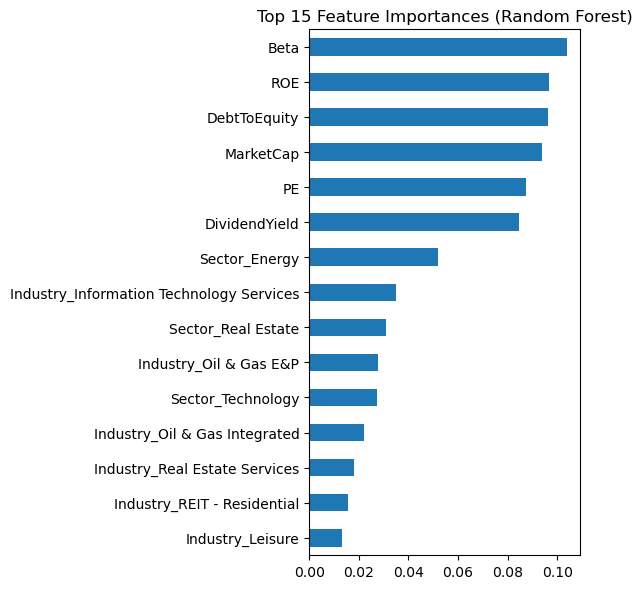

In [59]:
import matplotlib.pyplot as plt
from pathlib import Path

RESULTS_DIR = Path("../results")
RESULTS_DIR.mkdir(exist_ok=True)

top15 = feat_imp.head(15)[::-1]
plt.figure(figsize=(6,6))
top15.plot(kind="barh")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.savefig(RESULTS_DIR / "feature_importance_rf.png")
plt.show()
